In [7]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [12]:
batter = pd.read_csv("BetterBatter.csv")

In [18]:
batter = batter.drop(columns=['Unnamed: 0'])

In [19]:
batter.head()

,player_id,year,Age,AB,H,HR,AVG,SLG,OBP,OPS,RBI,SB,Last Name,First Name
0,405395,2019,39,491,120,23,0.244,0.430,0.305,0.735,93,3,Pujols,Albert
1,408234,2019,36,493,139,12,0.282,0.398,0.346,0.744,59,0,Cabrera,Miguel
2,425783,2019,36,563,149,24,0.265,0.455,0.371,0.826,61,15,Choo,Shin-Soo
3,430945,2019,33,485,126,16,0.260,0.414,0.313,0.727,67,2,Jones,Adam
4,443558,2019,38,454,141,41,0.311,0.639,0.392,1.031,108,0,Cruz Jr.,Nelson


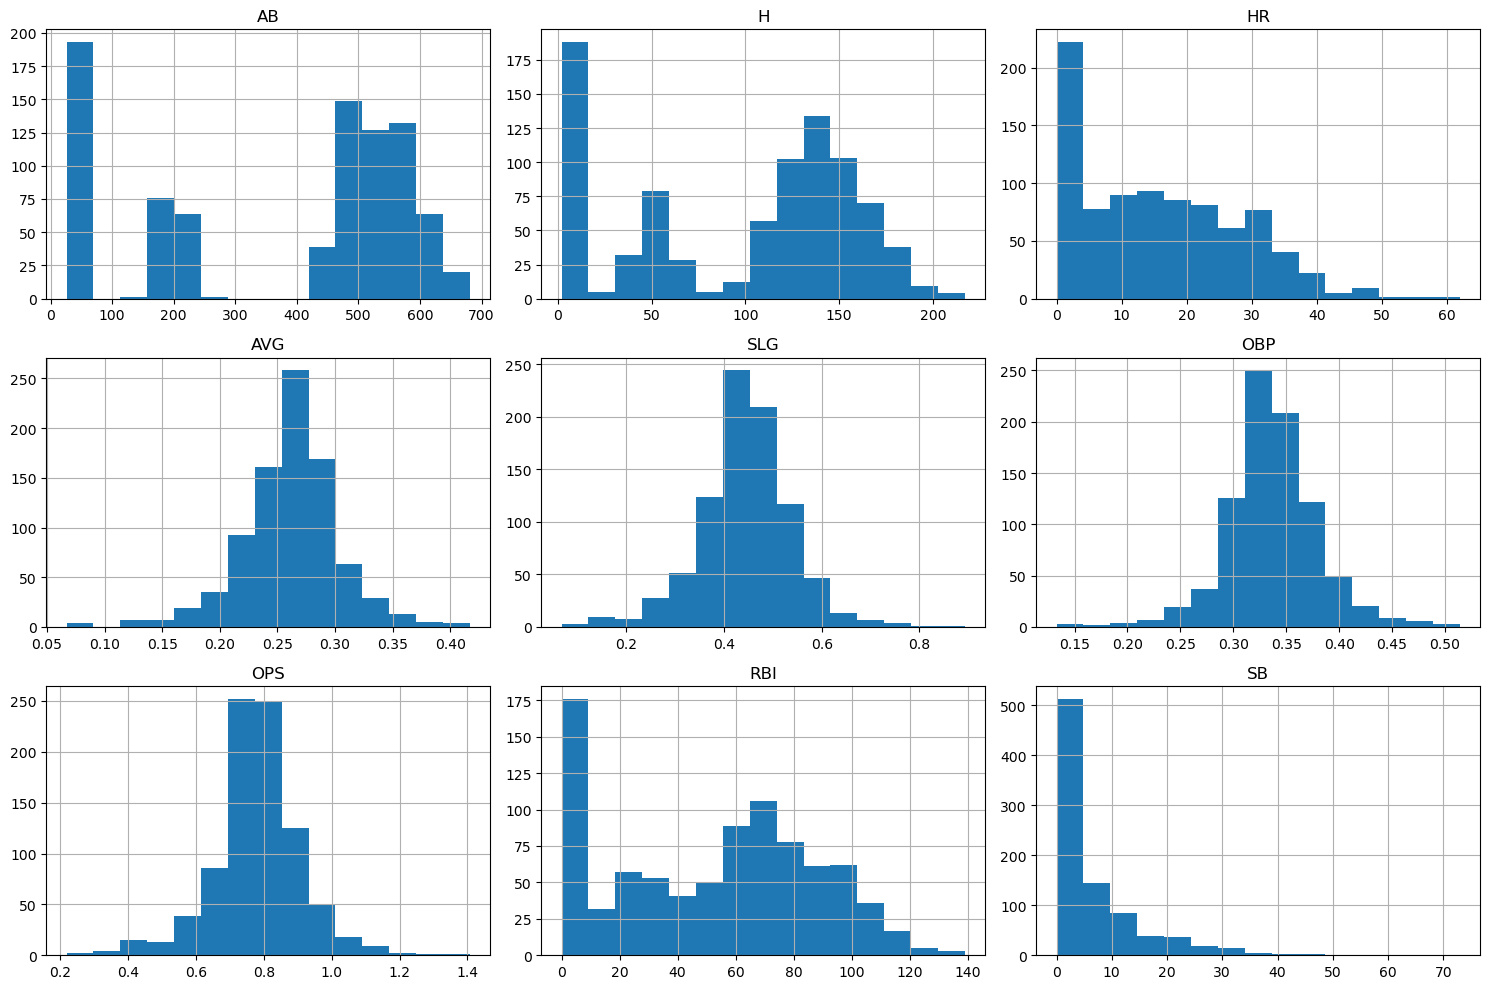

/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

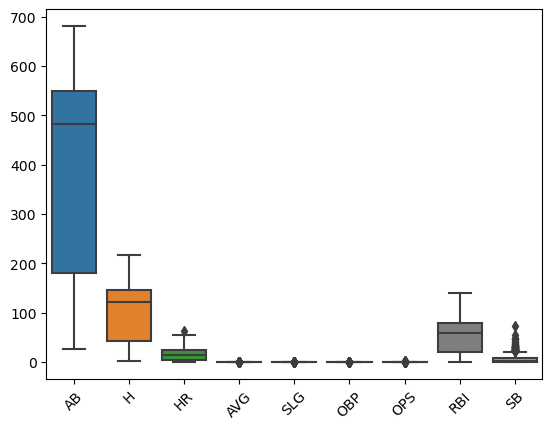

In [22]:
# histograms
hist_columns = ['AB', 'H', 'HR', 'AVG', 'SLG', 'OBP', 'OPS', 'RBI', 'SB']
batter[hist_columns].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# boxplots 
sns.boxplot(data=batter[['AB', 'H', 'HR', 'AVG', 'SLG', 'OBP', 'OPS', 'RBI', 'SB']])
plt.xticks(rotation=45)
plt.show()

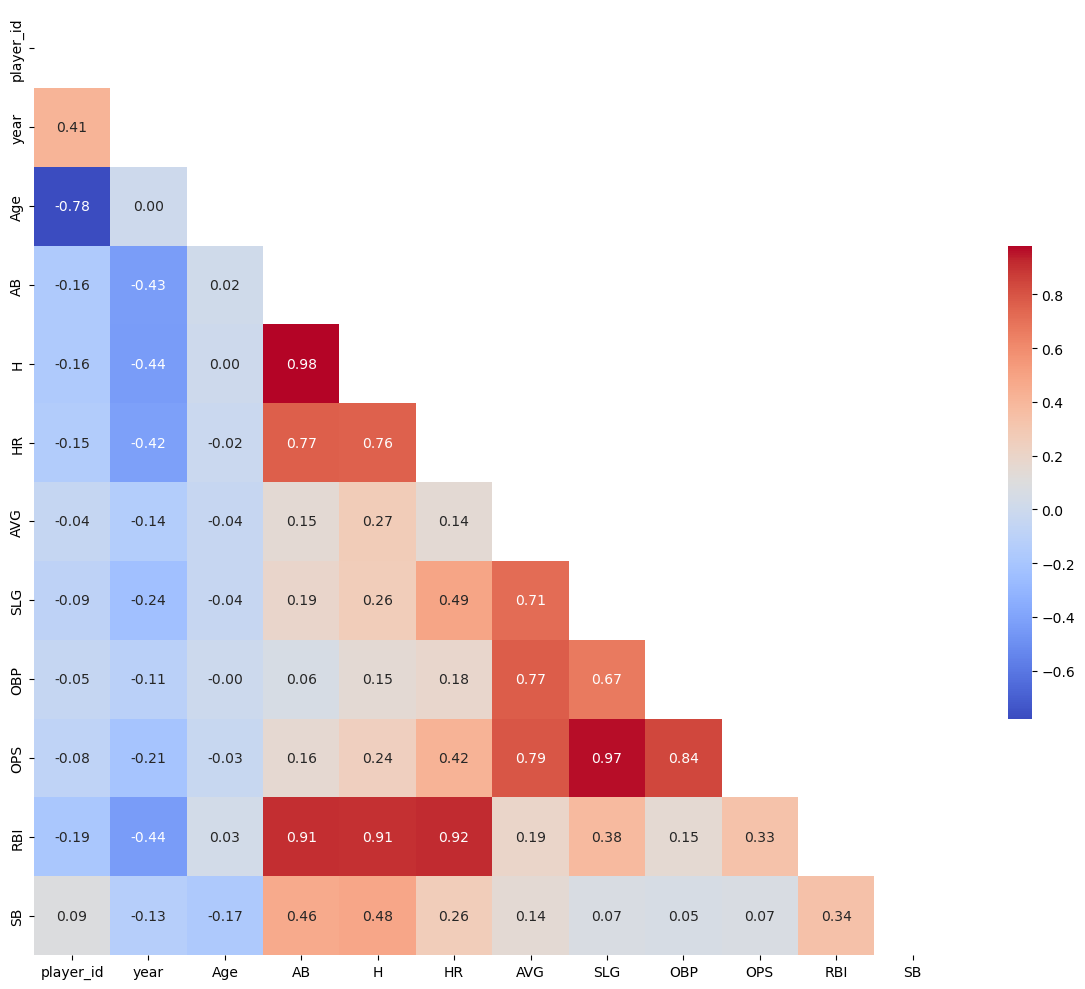

In [21]:
# correlation analysis 
numeric_cols = batter.select_dtypes(include=[np.number]).columns
correlation_matrix = batter[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))  # Increase figure size
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .5})

plt.tight_layout()
plt.show()

REPORT INSERT: 

Distribution of Batting Statistics
Our dataset comprises batting statistics from the years 2019-2023. The histograms (Figure 1) provide a visual summary of the distribution of each statistic. Notably, 'At Bats' (AB) and 'Hits' (H) display right-skewed distributions, indicating a smaller number of batters have exceptionally high values in these categories. 'Home Runs' (HR), 'Runs Batted In' (RBI), and 'Stolen Bases' (SB) also show a positive skew, suggesting the presence of outliers who significantly outperform the average.

The batting average (AVG) histogram reveals a concentration around the 0.250 mark, which could be considered the mode for batting averages in this dataset. 'Slugging Percentage' (SLG) and 'On-base Plus Slugging' (OPS) display relatively symmetrical distributions, hinting at a normal distribution for power-hitting metrics.

Statistical Range and Outliers
Boxplots (Figure 2) present the range and interquartile range for each statistic, highlighting the presence of outliers in several categories. Notably, 'Home Runs', 'Runs Batted In', and 'Stolen Bases' showcase several extreme values well above the upper quartiles, indicative of star performers in these areas. The boxplot for 'Average' is relatively compact, suggesting less variance compared to other statistics.

Correlation between Statistics
The correlation matrix heatmap (Figure 3) elucidates the relationships between different statistics. High correlations (close to 1 or -1) indicate a strong relationship between two variables, while correlations near zero suggest a lack of linear association.

Significant positive correlations are evident between 'Runs Batted In' (RBI) and 'Home Runs' (HR), which is expected as home runs directly contribute to runs batted in. There is also a notable positive correlation between 'On-base Percentage' (OBP) and 'On-base Plus Slugging' (OPS), the latter being a direct combination of the former with 'Slugging Percentage' (SLG).

Interestingly, 'Stolen Bases' (SB) has a slight negative correlation with 'Age', suggesting that younger players may be more inclined or able to steal bases. However, 'Age' has very little correlation with 'At Bats' (AB), indicating that opportunities at the plate are not strongly dependent on the age of the players.

In summary, the EDA reveals a dataset with diverse distributions and varying degrees of correlation between batting statistics. The presence of outliers across several metrics underlines the disparity in performance levels within professional batters. The insights gleaned from this analysis will inform our predictive modeling strategy, specifically in the careful handling of outliers and feature selection based on observed correlations.